<a href="https://colab.research.google.com/github/tawadros312/SoloFit-/blob/main/SoloFit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Solo Fit Project**
**Team :-**

Tawadros Gamal

Hossam Mohammed Osman

Hossam Abd Elhakeem

Mahmoud Khaled

Kirolos Michael





##**Tasks**

Hossam Mohammed Osman & Kirolos & Hossam  ( Documentation)

Tawadros & Mahmoud & Hossam (Working on the Model)

tawadros (Plot,deploy,prediction) ,
Mahmoud(Train,Evaluate) , 
Hossam(Preprocess,Compile)


##Loading Data Set

In [ ]:
!git clone https://github.com/srohit0/food_mnist.git
!pip install food_mnist


fatal: destination path 'food_mnist' already exists and is not an empty directory.
ERROR: Could not find a version that satisfies the requirement food_mnist (from versions: none)
ERROR: No matching distribution found for food_mnist


In [ ]:
import food_mnist

(x_train, y_train), (x_test, y_test) = food_mnist.load_data()
labels_dict = food_mnist.labels()

Image shape: (224, 224, 3)


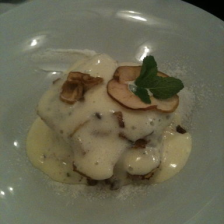

9


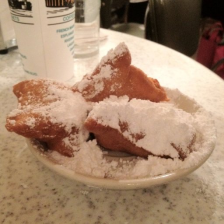

4


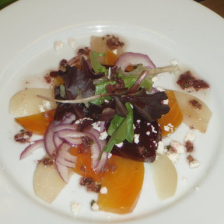

1


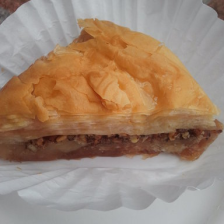

3


In [ ]:
import random
from google.colab.patches import cv2_imshow

print("Image shape:", x_train[0].shape)
for x in range(4):
  image = x_train[random.randint(0,3750)]
  label=y_train[random.randint(0,3750)]
  cv2_imshow(image)
  print(label)

In [ ]:
food_mnist.labels()

{0: 'apple_pie',
 1: 'baby_back_ribs',
 2: 'baklava',
 3: 'beef_carpaccio',
 4: 'beef_tartare',
 5: 'beet_salad',
 6: 'beignets',
 7: 'bibimbap',
 8: 'bread_pudding',
 9: 'breakfast_burrito'}

##**Preprocess the Data**

In [ ]:
def scale_mnist_data(train_images, test_images):
    """
    This function takes in the training and test images as loaded in the cell above, and scales them
    so that they have minimum and maximum values equal to 0 and 1 respectively.
    Your function should return a tuple (train_images, test_images) of scaled training and test images.
    """
    train_images = train_images / 255.
    test_images = test_images / 255.
    return train_images, test_images
scaled_train_images, scaled_test_images = scale_mnist_data(x_train, x_test)

##**Build the Model**

In [ ]:
#Building the NN function

def get_model():
    """
    This function should build a Sequential model according to the above specification. Ensure the 
    weights are initialised by providing the input_shape argument in the first layer.
    Your function should return the model.
    """
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(8, 3, activation='relu', input_shape=(28, 28, 1), padding="SAME"),
        tf.keras.layers.MaxPooling2D(2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax'),
    ])
    return model
model = get_model()

##**Compile the Model**

In [ ]:
#Compile the mode function

def compile_model(model):
    """
    This function takes in the model returned from your get_model function, and compiles it with an optimiser,
    loss function and metric.
    Compile the model using the Adam optimiser (with default settings), the cross-entropy loss function and
    accuracy as the only metric. 
    Your function doesn't need to return anything; the model will be compiled in-place.
    """
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
compile_model(model)

##**Training the Model**

In [ ]:
def train_model(model, scaled_train_images, train_labels):
    """
    This function should train the model for 5 epochs on the scaled_train_images and train_labels. 
    Your function should return the training history, as returned by model.fit.
    """
    
    return model.fit(scaled_train_images[..., np.newaxis], train_labels, epochs=10)
history = train_model(model, scaled_train_images, train_labels)

##**Plot the Learning Cureves**

##**Evaluate the Model**

##**Model predictions**

##**Model Deployment**